# Hypothesis: Students who take notes more often will find the lessons more effective than students who take notes less often.

### I chose this hypothesis because I believe notetaking increases comprehension and retention, and therefore people who take notes will be able to comprehend and retain the lessons easier, and therefore find the lessons more effective.

In [1]:
    %reload_ext autoreload
    %autoreload 2

In [ ]:
__author__ = "730433261"

In [2]:
from tabulate import tabulate

DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

## First I read in the csv and converted it to a column-oriented table to allow for easier analysis.

In [3]:
from data_utils import read_csv_rows, columnar
data_rows: list[dict[str, str]] = read_csv_rows(DATA_FILE_PATH)
data_cols: dict[str, list[str]] = columnar(data_rows)

print(f"Data File Read: {DATA_FILE_PATH}")
print(f"{len(data_rows)} rows")
print(f"{len(data_rows[0].keys())} columns")

Data File Read: ../../data/survey.csv
573 rows
36 columns


## Then I selected for the two desired columns, `own_notes` and `ls_effective`. Here are the first 10 rows:

In [4]:
from data_utils import head, select

selected_data: dict[str, list[str]] = select(data_cols, ["own_notes", "ls_effective"])

tabulate(head(selected_data, 10), selected_data.keys(), "html")

own_notes,ls_effective
4,7
7,6
7,7
6,7
5,6
7,5
4,6
7,6
7,6
6,7


### Before I calculated any averages, I wanted to visualize both variables as frequencies to give a clue as to if there was any relationship.
### Since `own_notes` and `ls_effective` were on the same scale (1-7), I decided to sort them to allow for better comparison.
#### Note than even though both were on a 1-7 scale, they represented different things;
`own_notes`: 1 being Never and 7 being Always // `ls_effective`: 1 being Strongly Disagree and 7 being Strongly Agree
#### but I felt were still similar enough for comparison.

notes_counts: {'1': 6, '2': 12, '3': 20, '4': 57, '5': 83, '6': 118, '7': 277}
efficacy_counts: {'1': 6, '2': 18, '3': 40, '4': 62, '5': 126, '6': 170, '7': 151}


<BarContainer object of 7 artists>

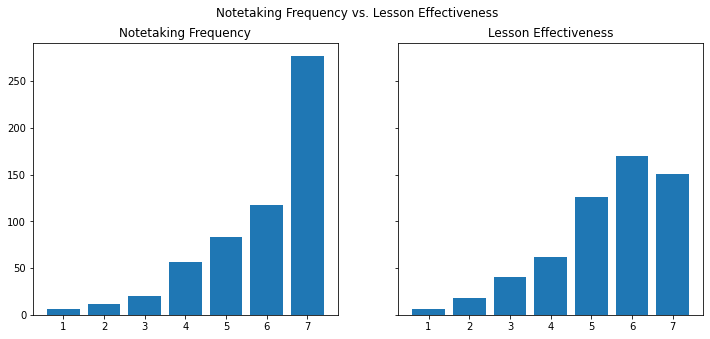

In [5]:
from data_utils import count, count_sort

notes_counts: dict[str, int] = count_sort(count(selected_data["own_notes"]))
print(f"notes_counts: {notes_counts}")

efficacy_counts: dict[str, int] = count_sort(count(selected_data["ls_effective"]))
print(f"efficacy_counts: {efficacy_counts}")

from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Notetaking Frequency vs. Lesson Effectiveness")


axes[0].set_title("Notetaking Frequency")
axes[0].bar(notes_counts.keys(), notes_counts.values())

axes[1].set_title("Lesson Effectiveness")
axes[1].bar(efficacy_counts.keys(), efficacy_counts.values())

### Comparing the two led to some interesting results. 
There seems to be a clear relationship from 1-6, but at 7 a sharp difference appears. The striking similarities compared with the stark difference led me to be unsure how the relationship would turn out.

#### Note: I checked because I was curious, and the 6 people who responded '1' on the notetaking frequency *are not* the same 6 people who responed '1' on lesson efficacy.

## Where things get complicated
### Here I defined five additional functions to generate the needed averages. At this point the desired columns had already been selected.
First // `int_select`: I turned the `list` values in the columns from the `select` function from `str` to `int` to allow for numerical computations.

Second // `row_based`: I turned the columns back into rows, I did this so each row would only have the two desired columns, and I could compare each individual against themselves.

Third // `filt_high` and `filt_low`: I filtered for individuals who rated higher than 4 on notetaking and 4 or below on notetaking, and compiled their lesson efficacy ratings. Note: I chose > 4 and <= 4 as I didn't want there to be overlap (because 4 was the exact center), and the majority of responses still existed in the 5 and above range.

Fourth // `average_int`: Using the filtered lists, I took the average lesson efficacy from both.

Fifth // Difference: Just to make the results easier to comprehend, I took the difference between the averages to show how different the groups were from eachother.

In [6]:
from data_utils import int_select, row_based, filt_low, filt_high, average_int

print(f"Lesson efficacy average for students who rated > 4 on notetaking: {average_int(filt_high(row_based(int_select(selected_data))))}")
print(f"Lesson efficacy average for students who rated <= 4 on notetaking: {average_int(filt_low(row_based(int_select(selected_data))))}")
print(f"Difference: {(average_int(filt_high(row_based(int_select(selected_data))))) - (average_int(filt_low(row_based(int_select(selected_data)))))}")

Lesson efficacy average for students who rated > 4 on notetaking: 5.510460251046025
Lesson efficacy average for students who rated <= 4 on notetaking: 5.08421052631579
Difference: 0.42624972473023526


# Conclusion...
## ... the data was inconclusive.
While, on average, people who took notes more often believed the lessons to be more effective than those who took notes less often, a difference of 0.43 is far from a strong indicator. This relationship is *far* weaker than I thought it would be. Even more suprising, when I moved the cutoff point in either direction (e.g. from '> 4 & <= 4' to '> 3 & <= 3' and '> 5 & <=5') the difference actually became *smaller*. This leads me to believe that there may not be a relationship at all and if there is, it is is *very* weak. This result was very suprising to me, and I am hard-pressed to reason my way through it; maybe people still feel they can get everything out of the lessons by just following along in VSCode (when applicable) or maybe people who don't take notes "don't know what they don't know", and thus overestimate their comprehension of the lessons. 

I feel it's most likely, however, as Occam's Razor tells us, that there is simply no relationship.